<a href="https://colab.research.google.com/github/leeflesstree/cs471Final/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best Accuracy: 0.8443900048995591
              precision    recall  f1-score   support

       anger       0.65      0.56      0.60        27
    contempt       0.69      0.82      0.75        11
     disgust       0.81      0.86      0.83        35
        fear       0.86      0.80      0.83        15
       happy       0.98      1.00      0.99        42
     sadness       0.62      0.59      0.61        17
    surprise       0.96      0.98      0.97        50

    accuracy                           0.85       197
   macro avg       0.80      0.80      0.80       197
weighted avg       0.84      0.85      0.84       197



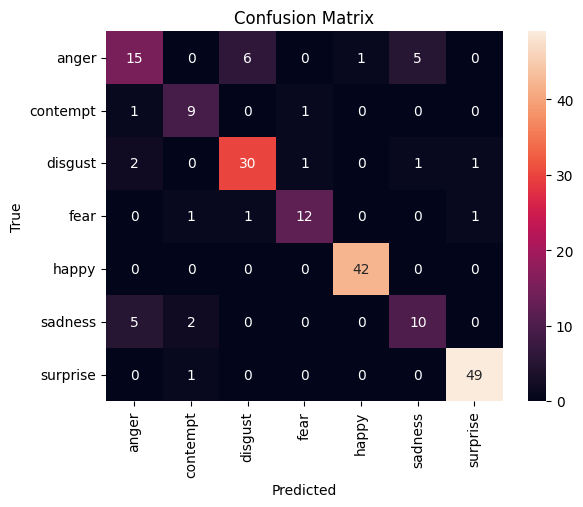

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import csv
import pandas as pd
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)
import seaborn as sns

def main():
    #Load data sets
    train_df = pd.read_csv('features_train.csv')
    test_df = pd.read_csv('features_test.csv')

    #Split data
    X_train = train_df.drop(['emotion', 'image_name'], axis=1)
    y_train = train_df['emotion']

    X_test = test_df.drop(['emotion', 'image_name'], axis=1)
    y_test = test_df['emotion']

    #Fine tune hyperparameters with training set
    param_grid = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    }

    clf = DecisionTreeClassifier(random_state=1)

    grid_search = GridSearchCV(estimator=clf, param_grid = param_grid)

    grid_search.fit(X_train, y_train)

    tree_clf = grid_search.best_estimator_

    #Print the classification report with the testing set
    pred = tree_clf.predict(X_test)

    print(f"Best Accuracy: {grid_search.best_score_}")

    print(classification_report(y_test, pred))

    #Following the report print the confusion matrix
    cmat = confusion_matrix(y_test, pred)

    sns.heatmap(cmat, annot=True, fmt='d', xticklabels=['anger',
      'contempt','disgust', 'fear', 'happy', 'sadness', 'surprise'], yticklabels=['anger', 'contempt',
      'disgust', 'fear', 'happy', 'sadness', 'surprise'])

    #Label the heatmap
    plt.title('Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted', fontsize=10)
    plt.ylabel('True', fontsize=10)

if __name__ == '__main__':
  main()

